In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df=pd.read_csv('height-weight.csv')

In [6]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [8]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [10]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


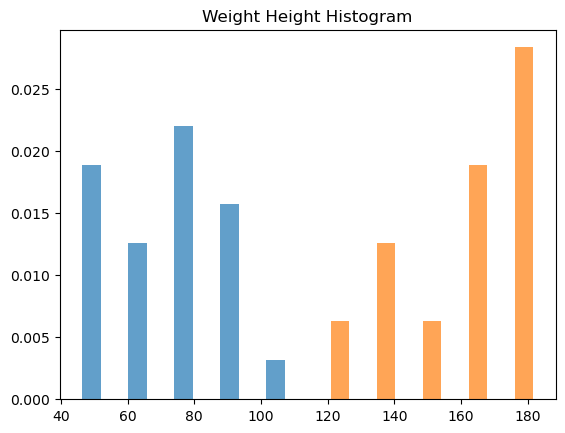

In [16]:
plt.hist(df, bins=10, alpha=0.7, density=True)
plt.title('Weight Height Histogram')
plt.xlabel('')
plt.xlabel('')
plt.show()

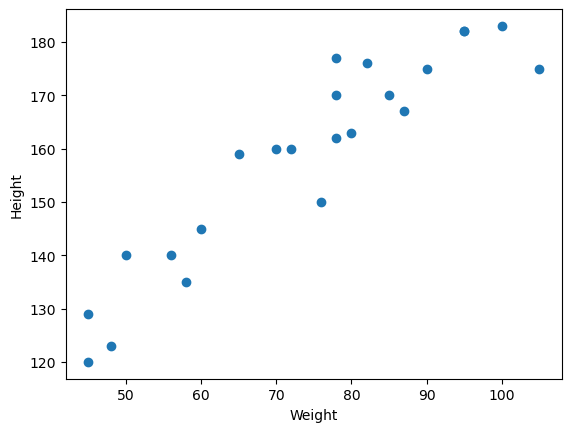

In [22]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [24]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


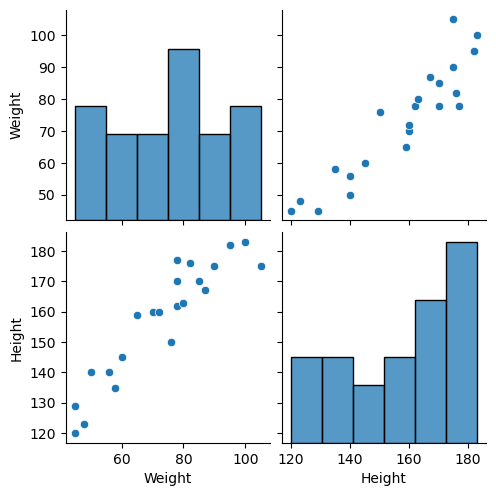

In [34]:
sns.pairplot(df, kind='scatter')
plt.show()

In [36]:
X=df[['Weight']]
y=df['Height']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler=StandardScaler()

In [44]:
X_train=scaler.fit_transform(X_train)

In [46]:
X_train.shape

(17, 1)

In [48]:
X_test=scaler.transform(X_test)

In [50]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [52]:
regression.fit(X_train,y_train)

LinearRegression()

In [84]:
X_train.shape,y_train.shape

((17, 1), (17,))

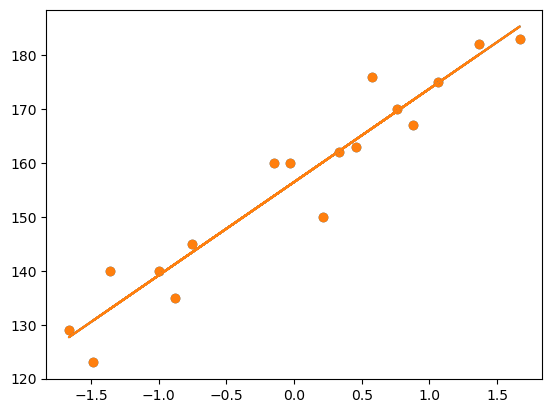

In [56]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

In [58]:
## Prediction
y_pred=regression.predict(X_test)

In [60]:
### Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error
mse=mean_squared_error(y_pred,y_test)
mae=mean_absolute_error(y_pred,y_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


In [64]:
from sklearn.metrics import r2_score
r2score=r2_score(y_pred,y_test)
print(r2score)

0.7242334405003443


In [70]:
#display adjusted R-squared
1 - (1-r2score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6552918006254305

In [72]:
### OLS
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [78]:
prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [82]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 06 Nov 2025   Prob (F-statistic):                       0.664
Time:                        09:51:06   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\Users\singh\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)
